### Import libraries

In [1]:
from IPython.core.display import display, HTML # for some notebook formatting.

import mlrose_hiive
import numpy as np
import pandas as pd
import logging
import networkx as nx
import matplotlib.pyplot as plt
import string

from ast import literal_eval

from mlrose_hiive import TSPGenerator
from mlrose_hiive import RHCRunner, SARunner, GARunner, MIMICRunner

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

C:\Users\akoutras\AppData\Local\Temp\ipykernel_20252\854251365.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML # for some notebook formatting.


#### 1a) Randomized hill climbing

In [4]:
j = 0
size_list = [5, 15, 30]
seed_list = [1, 2, 3, 4, 5]

for size in size_list:
    j += 1        
    i = 0
    for seed in seed_list:
        i += 1 
        
        # Generate a new TSP problem using a fixed seed.
        problem = TSPGenerator().generate(seed=100, number_of_cities=size)
        
        # create a runner class and solve the problem
        rhc = RHCRunner(problem=problem,
                   experiment_name='tsp_rhc',
                   output_directory=None,seed=seed,
                   iteration_list= np.arange(1,3001),
                   max_attempts=500,
                   restart_list=[0])

        # the two data frames will contain the results
        df_run_stats, df_run_curves = rhc.run()

        if i==1:
            
            df_fitness_seed = pd.DataFrame()
            df_fevals_seed = pd.DataFrame()
            df_time_seed = pd.DataFrame() 
            
            df_fitness_seed = df_run_stats[['Iteration']]
            df_fevals_seed = df_run_stats[['Iteration']]
            df_time_seed = df_run_stats[['Iteration']]

        df_fitness_seed[f'seed{seed}'] = df_run_stats[['Fitness']]
        df_fevals_seed[f'seed{seed}'] = df_run_stats[['FEvals']]
        df_time_seed[f'seed{seed}'] = df_run_stats[['Time']]

    column_list = df_fitness_seed.columns.values.tolist()[1:]
    if j==1:
        df_fitness_small = df_run_stats[['Iteration']]
        df_fitness_small['mean'] = df_fitness_seed[column_list].mean(axis=1)
        df_fitness_small['std'] = df_fitness_seed[column_list].std(axis=1)
        
        df_fevals_small = df_run_stats[['Iteration']]
        df_fevals_small['mean'] = df_fevals_seed[column_list].mean(axis=1)
        df_fevals_small['std'] = df_fevals_seed[column_list].std(axis=1)
        
        df_time_small = df_run_stats[['Iteration']]
        df_time_small['mean'] = df_time_seed[column_list].mean(axis=1)
        df_time_small['std'] = df_time_seed[column_list].std(axis=1)
        
    if j==2:        
        df_fitness_medium = df_run_stats[['Iteration']]
        df_fitness_medium['mean'] = df_fitness_seed[column_list].mean(axis=1)
        df_fitness_medium['std'] = df_fitness_seed[column_list].std(axis=1)
        
        df_fevals_medium = df_run_stats[['Iteration']]
        df_fevals_medium['mean'] = df_fevals_seed[column_list].mean(axis=1)
        df_fevals_medium['std'] = df_fevals_seed[column_list].std(axis=1)
        
        df_time_medium = df_run_stats[['Iteration']]
        df_time_medium['mean'] = df_time_seed[column_list].mean(axis=1)
        df_time_medium['std'] = df_time_seed[column_list].std(axis=1)
        
    if j==3:        
        df_fitness_large = df_run_stats[['Iteration']]
        df_fitness_large['mean'] = df_fitness_seed[column_list].mean(axis=1)
        df_fitness_large['std'] = df_fitness_seed[column_list].std(axis=1)
        
        df_fevals_large = df_run_stats[['Iteration']]
        df_fevals_large['mean'] = df_fevals_seed[column_list].mean(axis=1)
        df_fevals_large['std'] = df_fevals_seed[column_list].std(axis=1)
        
        df_time_large = df_run_stats[['Iteration']]
        df_time_large['mean'] = df_time_seed[column_list].mean(axis=1)
        df_time_large['std'] = df_time_seed[column_list].std(axis=1)

In [5]:
df_fitness_small.to_csv('rhc_df_fitness_small1.csv')
df_fitness_medium.to_csv('rhc_df_fitness_medium1.csv')
df_fitness_large.to_csv('rhc_df_fitness_large1.csv')

df_fevals_small.to_csv('rhc_df_fevals_small1.csv')
df_fevals_medium.to_csv('rhc_df_fevals_medium1.csv')
df_fevals_large.to_csv('rhc_df_fevals_large1.csv')

df_time_small.to_csv('rhc_df_time_small1.csv')
df_time_medium.to_csv('rhc_df_time_medium1.csv')
df_time_large.to_csv('rhc_df_time_large1.csv')

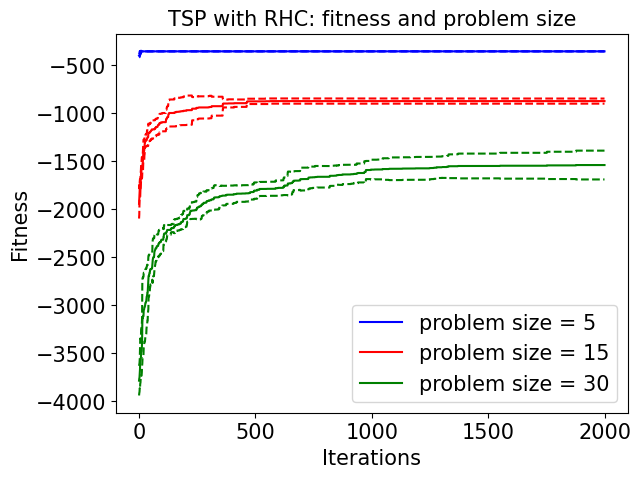

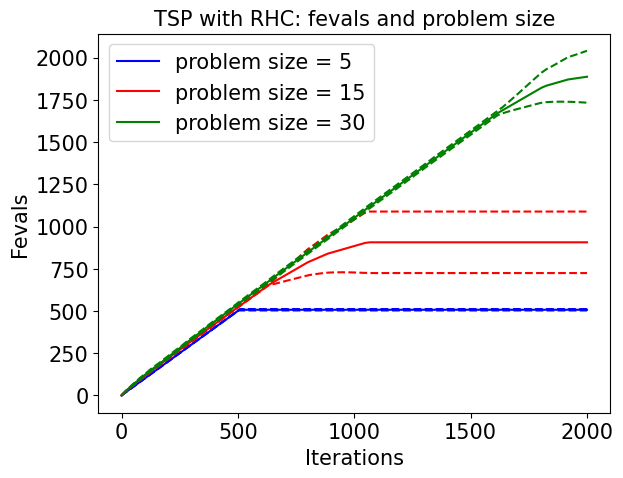

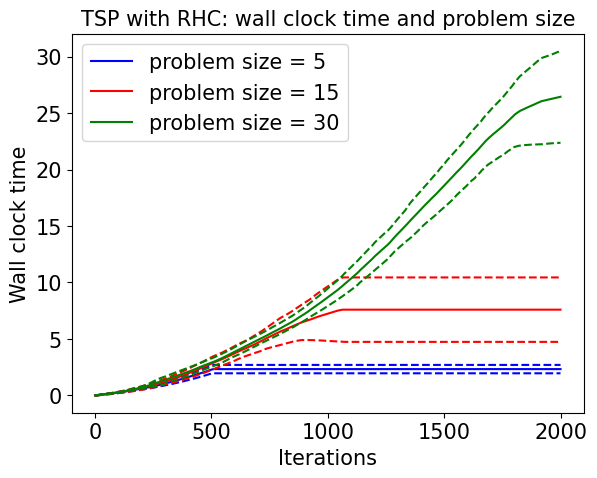

In [63]:
#fontsize = 15
#fig = plt.figure()
#ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
#ax.plot(df_fitness_small['Iteration'].values, -df_fitness_small['mean'].values, label=f'problem size = {size_list[0]}')
#ax.plot(df_fitness_medium['Iteration'].values, -df_fitness_medium['mean'].values, label=f'problem size = {size_list[1]}')
#ax.plot(df_fitness_large['Iteration'].values, -df_fitness_large['mean'].values, label=f'problem size = {size_list[2]}')
#ax.legend(fontsize=fontsize)
#ax.set_title('Fitness and problem size', fontsize=fontsize)
#ax.tick_params(labelsize=fontsize)
#ax.set_xlabel('Iterations', fontsize=fontsize) 
#ax.set_ylabel('Fitness', fontsize=fontsize)
##ax.set_ylim(0.6, 1.02)
##ax.set_xlim(0, 4000)
##fig.savefig('DT-learning_curves-roc_auc.png')
#plt.show()
#plt.close(fig)


fontsize = 15
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])

ax.plot(df_fitness_small['Iteration'].values, -df_fitness_small['mean'].values, label=f'problem size = {size_list[0]}',color='b')
ax.plot(df_fitness_small['Iteration'].values, -(df_fitness_small['mean'].values + df_fitness_small['std'].values), '--b')
ax.plot(df_fitness_small['Iteration'].values, -(df_fitness_small['mean'].values - df_fitness_small['std'].values), '--b')

ax.plot(df_fitness_medium['Iteration'].values, -df_fitness_medium['mean'].values, label=f'problem size = {size_list[1]}',color='r')
ax.plot(df_fitness_medium['Iteration'].values, -(df_fitness_medium['mean'].values + df_fitness_medium['std'].values), '--r')
ax.plot(df_fitness_medium['Iteration'].values, -(df_fitness_medium['mean'].values - df_fitness_medium['std'].values), '--r')

ax.plot(df_fitness_large['Iteration'].values, -df_fitness_large['mean'].values, label=f'problem size = {size_list[2]}',color='g')
ax.plot(df_fitness_large['Iteration'].values, -(df_fitness_large['mean'].values + df_fitness_large['std'].values), '--g')
ax.plot(df_fitness_large['Iteration'].values, -(df_fitness_large['mean'].values - df_fitness_large['std'].values), '--g')

ax.legend(fontsize=fontsize)
ax.set_title('TSP with RHC: fitness and problem size', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Fitness', fontsize=fontsize)
#ax.set_ylim(0.6, 1.02)
#ax.set_xlim(0, 4000)
#fig.savefig('DT-learning_curves-roc_auc.png')
plt.show()
plt.close(fig)

fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])

ax.plot(df_fitness_small['Iteration'].values, df_fevals_small['mean'].values, label=f'problem size = {size_list[0]}',color='b')
ax.plot(df_fitness_small['Iteration'].values, df_fevals_small['mean'].values + df_fevals_small['std'].values, '--b')
ax.plot(df_fitness_small['Iteration'].values, df_fevals_small['mean'].values - df_fevals_small['std'].values, '--b')

ax.plot(df_fitness_medium['Iteration'].values,df_fevals_medium['mean'].values, label=f'problem size = {size_list[1]}',color='r')
ax.plot(df_fitness_medium['Iteration'].values,df_fevals_medium['mean'].values + df_fevals_medium['std'].values, '--r')
ax.plot(df_fitness_medium['Iteration'].values,df_fevals_medium['mean'].values - df_fevals_medium['std'].values, '--r')

ax.plot(df_fitness_large['Iteration'].values, df_fevals_large['mean'].values, label=f'problem size = {size_list[2]}',color='g')
ax.plot(df_fitness_large['Iteration'].values, df_fevals_large['mean'].values + df_fevals_large['std'].values, '--g')
ax.plot(df_fitness_large['Iteration'].values, df_fevals_large['mean'].values - df_fevals_large['std'].values, '--g')

ax.legend(fontsize=fontsize)
ax.set_title('TSP with RHC: fevals and problem size', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Fevals', fontsize=fontsize)
#ax.set_ylim(0.6, 1.02)
#ax.set_xlim(0, 4000)
#fig.savefig('DT-learning_curves-roc_auc.png')
plt.show()
plt.close(fig)

fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])

ax.plot(df_fitness_small['Iteration'].values, df_time_small['mean'].values, label=f'problem size = {size_list[0]}',color='b')
ax.plot(df_fitness_small['Iteration'].values, df_time_small['mean'].values + df_time_small['std'].values, '--b')
ax.plot(df_fitness_small['Iteration'].values, df_time_small['mean'].values - df_time_small['std'].values, '--b')

ax.plot(df_fitness_medium['Iteration'].values,df_time_medium['mean'].values, label=f'problem size = {size_list[1]}',color='r')
ax.plot(df_fitness_medium['Iteration'].values,df_time_medium['mean'].values + df_time_medium['std'].values, '--r')
ax.plot(df_fitness_medium['Iteration'].values,df_time_medium['mean'].values - df_time_medium['std'].values, '--r')

ax.plot(df_fitness_large['Iteration'].values, df_time_large['mean'].values, label=f'problem size = {size_list[2]}',color='g')
ax.plot(df_fitness_large['Iteration'].values, df_time_large['mean'].values + df_time_large['std'].values, '--g')
ax.plot(df_fitness_large['Iteration'].values, df_time_large['mean'].values - df_time_large['std'].values, '--g')

ax.legend(fontsize=fontsize)
ax.set_title('TSP with RHC: wall clock time and problem size', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Wall clock time', fontsize=fontsize)
#ax.set_ylim(0.6, 1.02)
#ax.set_xlim(0, 4000)
#fig.savefig('DT-learning_curves-roc_auc.png')
plt.show()
plt.close(fig)

#### 1b) Simulated Annealing

In [41]:
# Small set
size = 5

i = 0
seed_list = [1, 2, 3, 4, 5]
for seed in seed_list:
    i += 1
    
    # Generate a new TSP problem using a fixed seed.
    problem = TSPGenerator().generate(seed=100, number_of_cities=size)
    
    # create a runner class and solve the problem
    sa = SARunner(problem=problem,
              experiment_name='tsp_sa',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=seed,
              iteration_list=np.arange(1,201),
              max_attempts=500,
#              temperature_list=[0.001, 0.0025, 0.005, 0.01, 0.025, 0.05, 0.1, 0.5, 1.0, 2.0],
              temperature_list=[0.001, 0.0015, 0.002],
              decay_list=[mlrose_hiive.ExpDecay])

    # the two data frames will contain the results
    df_run_stats, df_run_curves = sa.run()
        
    if i==1:
        
        df_fitness_seed = pd.DataFrame()
        df_fevals_seed = pd.DataFrame()
        df_time_seed = pd.DataFrame() 
    
        df_fitness_seed = df_run_stats[['Iteration']]
        df_fevals_seed = df_run_stats[['Iteration']]
        df_time_seed = df_run_stats[['Iteration']]

    df_fitness_seed[f'seed{seed}'] = df_run_stats[['Fitness']]
    df_fevals_seed[f'seed{seed}'] = df_run_stats[['FEvals']]
    df_time_seed[f'seed{seed}'] = df_run_stats[['Time']]
    
column_list = df_fitness_seed.columns.values.tolist()[1:]

df_fitness_small = df_run_stats[['Iteration']]
df_fitness_small['mean'] = df_fitness_seed[column_list].mean(axis=1)
df_fitness_small['std'] = df_fitness_seed[column_list].std(axis=1)

df_fevals_small = df_run_stats[['Iteration']]
df_fevals_small['mean'] = df_fevals_seed[column_list].mean(axis=1)
df_fevals_small['std'] = df_fevals_seed[column_list].std(axis=1)

df_time_small = df_run_stats[['Iteration']]
df_time_small['mean'] = df_time_seed[column_list].mean(axis=1)
df_time_small['std'] = df_time_seed[column_list].std(axis=1)

df_sa_small = df_run_stats[['Iteration']]
df_sa_small['Fitness_mean'] = df_fitness_small['mean']
df_sa_small['Fitness_std']  = df_fitness_small['std']
df_sa_small['FEvals_mean']  = df_fevals_small['mean']
df_sa_small['FEvals_std']   = df_fevals_small['std']
df_sa_small['Time_mean']    = df_time_small['mean']
df_sa_small['Time_std']     = df_time_small['std']
df_sa_small['Temperature']  = np.vectorize(lambda x: x.init_temp)(df_run_stats['Temperature'].values)
#
#fontsize = 15
#fig = plt.figure()
#ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
#ax.plot(df_fitness_small['Iteration'].values, df_fitness_small['mean'].values, label=f'problem size = {size_list[0]}')
#ax.legend(fontsize=fontsize)
#ax.set_title('SA Fitness and problem size', fontsize=fontsize)
#ax.tick_params(labelsize=fontsize)
#ax.set_xlabel('Iterations', fontsize=fontsize) 
#ax.set_ylabel('Fitness', fontsize=fontsize)
##ax.set_ylim(0.6, 1.02)
##ax.set_xlim(0, 4000)
##fig.savefig('DT-learning_curves-roc_auc.png')
#plt.show()
#plt.close(fig)

df_sa_small.to_csv('df_sa_small.csv')

In [42]:
best_fitness_sa_small = df_sa_small['Fitness_mean'].min()
best_runs_sa_small = df_sa_small[df_sa_small['Fitness_mean'] == best_fitness_sa_small]
best_runs_sa_small.head()

,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Temperature
17,17,360.984004,2.842171e-14,19.0,1.0,0.023884,0.002593,0.001
18,18,360.984004,2.842171e-14,20.0,1.0,0.025406,0.002612,0.001
19,19,360.984004,2.842171e-14,21.0,1.0,0.026771,0.002615,0.001
20,20,360.984004,2.842171e-14,22.0,1.0,0.028134,0.002643,0.001
21,21,360.984004,2.842171e-14,23.0,1.0,0.029519,0.002583,0.001


In [43]:
minimum_evaluations_sa_small = best_runs_sa_small['FEvals_mean'].min()
best_curve_run_sa_small = best_runs_sa_small[best_runs_sa_small['FEvals_mean'] == minimum_evaluations_sa_small]
minimum_time_sa_small = best_curve_run_sa_small['Time_mean'].min()
best_curve_run_sa_small = best_curve_run_sa_small[best_curve_run_sa_small['Time_mean'] == minimum_time_sa_small]
best_curve_run_sa_small

,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Temperature
17,17,360.984004,2.842171e-14,19.0,1.0,0.023884,0.002593,0.001


In [58]:
# Medium set
size = 15

i = 0
seed_list = [1, 2, 3, 4, 5]
for seed in seed_list:
    i += 1
    
    # Generate a new TSP problem using a fixed seed.
    problem = TSPGenerator().generate(seed=100, number_of_cities=size)
    
    # create a runner class and solve the problem
    sa = SARunner(problem=problem,
              experiment_name='tsp_sa',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=seed,
              iteration_list=np.arange(1,1401),
              max_attempts=500,
              temperature_list=[4.0, 5.0, 6.0, 7.0, 8.0],
            #temperature_list=[0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 8, 10],
            decay_list=[mlrose_hiive.ExpDecay])

    # the two data frames will contain the results
    df_run_stats, df_run_curves = sa.run()
        
    if i==1:
        
        df_fitness_seed = pd.DataFrame()
        df_fevals_seed = pd.DataFrame()
        df_time_seed = pd.DataFrame()         
        
        df_fitness_seed = df_run_stats[['Iteration']]
        df_fevals_seed = df_run_stats[['Iteration']]
        df_time_seed = df_run_stats[['Iteration']]

    df_fitness_seed[f'seed{seed}'] = df_run_stats[['Fitness']]
    df_fevals_seed[f'seed{seed}'] = df_run_stats[['FEvals']]
    df_time_seed[f'seed{seed}'] = df_run_stats[['Time']]
    
column_list = df_fitness_seed.columns.values.tolist()[1:]

df_fitness_medium = df_run_stats[['Iteration']]
df_fitness_medium['mean'] = df_fitness_seed[column_list].mean(axis=1)
df_fitness_medium['std'] = df_fitness_seed[column_list].std(axis=1)

df_fevals_medium = df_run_stats[['Iteration']]
df_fevals_medium['mean'] = df_fevals_seed[column_list].mean(axis=1)
df_fevals_medium['std'] = df_fevals_seed[column_list].std(axis=1)

df_time_medium = df_run_stats[['Iteration']]
df_time_medium['mean'] = df_time_seed[column_list].mean(axis=1)
df_time_medium['std'] = df_time_seed[column_list].std(axis=1)

df_sa_medium = df_run_stats[['Iteration']]
df_sa_medium['Fitness_mean'] = df_fitness_medium['mean']
df_sa_medium['Fitness_std']  = df_fitness_medium['std']
df_sa_medium['FEvals_mean']  = df_fevals_medium['mean']
df_sa_medium['FEvals_std']   = df_fevals_medium['std']
df_sa_medium['Time_mean']    = df_time_medium['mean']
df_sa_medium['Time_std']     = df_time_medium['std']
df_sa_medium['Temperature']  = np.vectorize(lambda x: x.init_temp)(df_run_stats['Temperature'].values)

df_sa_medium.to_csv('df_sa_medium.csv')

In [64]:
best_fitness_sa_medium = df_sa_medium['Fitness_mean'].min()
best_runs_sa_medium = df_sa_medium[df_sa_medium['Fitness_mean'] == best_fitness_sa_medium]
best_runs_sa_medium.head()

,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Temperature
8031,1026,866.814351,46.885234,1055.2,6.379655,83.421296,3.003446,5.0
8032,1027,866.814351,46.885234,1056.2,6.379655,83.505719,3.001080,5.0
8033,1028,866.814351,46.885234,1057.2,6.379655,83.584049,2.996225,5.0
8034,1029,866.814351,46.885234,1058.2,6.379655,83.663168,2.998154,5.0
8035,1030,866.814351,46.885234,1059.2,6.379655,83.743244,3.004199,5.0


In [65]:
minimum_evaluations_sa_medium = best_runs_sa_medium['FEvals_mean'].min()
best_curve_run_sa_medium = best_runs_sa_medium[best_runs_sa_medium['FEvals_mean'] == minimum_evaluations_sa_medium]
minimum_time_sa_medium = best_curve_run_sa_medium['Time_mean'].min()
best_curve_run_sa_medium = best_curve_run_sa_medium[best_curve_run_sa_medium['Time_mean'] == minimum_time_sa_medium]
best_curve_run_sa_medium

,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Temperature
8031,1026,866.814351,46.885234,1055.2,6.379655,83.421296,3.003446,5.0


In [6]:
# Large set
size = 30

i = 0
seed_list = [1, 2, 3, 4, 5]
for seed in seed_list:
    i += 1
    
    # Generate a new TSP problem using a fixed seed.
    problem = TSPGenerator().generate(seed=100, number_of_cities=size)
    
    # create a runner class and solve the problem
    sa = SARunner(problem=problem,
              experiment_name='tsp_sa',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=seed,
              iteration_list=np.arange(1,1401),
              max_attempts=500,
              temperature_list=[0.25, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 8, 10],
              decay_list=[mlrose_hiive.ExpDecay])

    # the two data frames will contain the results
    df_run_stats, df_run_curves = sa.run()
        
    if i==1:
    
        df_fitness_seed = pd.DataFrame()
        df_fevals_seed = pd.DataFrame()
        df_time_seed = pd.DataFrame()     
        
        df_fitness_seed = df_run_stats[['Iteration']]
        df_fevals_seed = df_run_stats[['Iteration']]
        df_time_seed = df_run_stats[['Iteration']]

    df_fitness_seed[f'seed{seed}'] = df_run_stats[['Fitness']]
    df_fevals_seed[f'seed{seed}']  = df_run_stats[['FEvals']]
    df_time_seed[f'seed{seed}']    = df_run_stats[['Time']]
    
column_list = df_fitness_seed.columns.values.tolist()[1:]

df_fitness_large = df_run_stats[['Iteration']]
df_fitness_large['mean'] = df_fitness_seed[column_list].mean(axis=1)
df_fitness_large['std'] = df_fitness_seed[column_list].std(axis=1)

df_fevals_large = df_run_stats[['Iteration']]
df_fevals_large['mean'] = df_fevals_seed[column_list].mean(axis=1)
df_fevals_large['std'] = df_fevals_seed[column_list].std(axis=1)

df_time_large = df_run_stats[['Iteration']]
df_time_large['mean'] = df_time_seed[column_list].mean(axis=1)
df_time_large['std'] = df_time_seed[column_list].std(axis=1)

df_sa_large = df_run_stats[['Iteration']]
df_sa_large['Fitness_mean'] = df_fitness_large['mean']
df_sa_large['Fitness_std']  = df_fitness_large['std']
df_sa_large['FEvals_mean']  = df_fevals_large['mean']
df_sa_large['FEvals_std']   = df_fevals_large['std']
df_sa_large['Time_mean']    = df_time_large['mean']
df_sa_large['Time_std']     = df_time_large['std']
df_sa_large['Temperature']  = np.vectorize(lambda x: x.init_temp)(df_run_stats['Temperature'].values)

df_sa_large.to_csv('df_sa_large.csv')

In [8]:
df_sa_large = pd.read_csv('df_sa_large.csv')
best_fitness_sa_large = df_sa_large['Fitness_mean'].min()
best_runs_sa_large = df_sa_large[df_sa_large['Fitness_mean'] == best_fitness_sa_large]
best_runs_sa_large.head()

,Unnamed: 0,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Temperature
9784,9784,1378,1479.929175,133.775296,1428.4,7.700649,121.205523,12.098413,5.0
9785,9785,1379,1479.929175,133.775296,1429.4,7.700649,121.308413,12.108648,5.0
9786,9786,1380,1479.929175,133.775296,1430.4,7.700649,121.407915,12.117545,5.0
9787,9787,1381,1479.929175,133.775296,1431.4,7.700649,121.505080,12.128052,5.0
9788,9788,1382,1479.929175,133.775296,1432.4,7.700649,121.601783,12.136765,5.0


In [9]:
minimum_evaluations_sa_large = best_runs_sa_large['FEvals_mean'].min()
best_curve_run_sa_large = best_runs_sa_large[best_runs_sa_large['FEvals_mean'] == minimum_evaluations_sa_large]
minimum_time_sa_large = best_curve_run_sa_large['Time_mean'].min()
best_curve_run_sa_large = best_curve_run_sa_large[best_curve_run_sa_large['Time_mean'] == minimum_time_sa_large]
best_curve_run_sa_large

,Unnamed: 0,Iteration,Fitness_mean,Fitness_std,FEvals_mean,FEvals_std,Time_mean,Time_std,Temperature
9784,9784,1378,1479.929175,133.775296,1428.4,7.700649,121.205523,12.098413,5.0


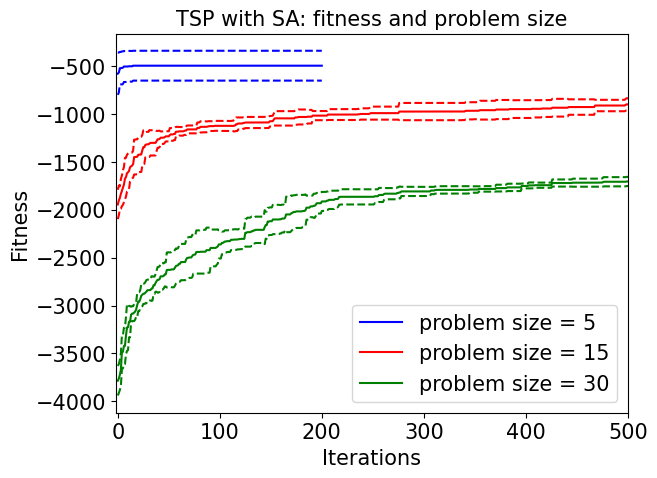

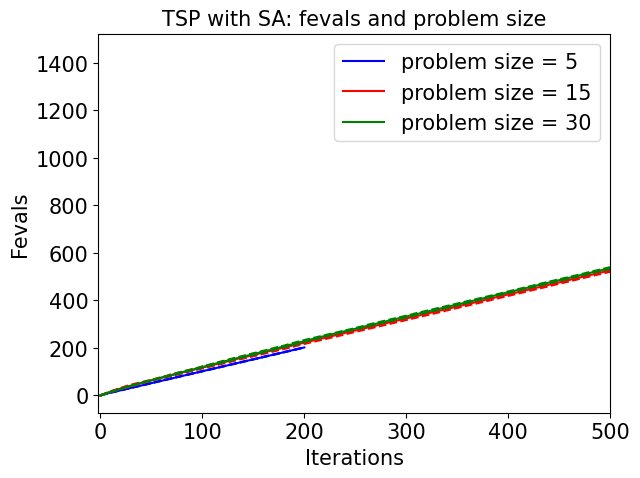

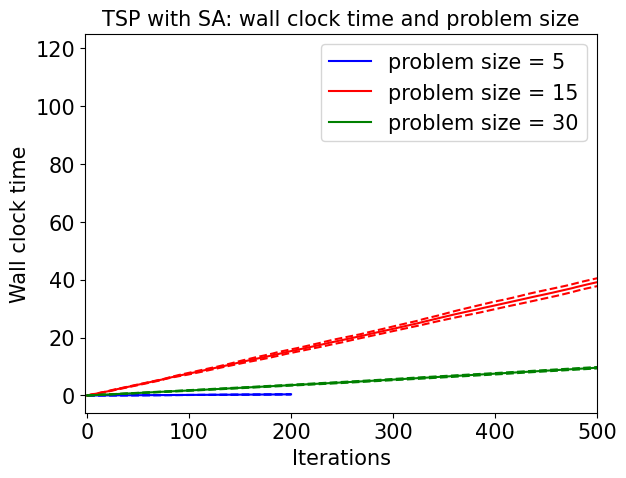

In [66]:
#fontsize = 15
#fig = plt.figure()
#ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
#ax.plot(df_sa_small[df_sa_small['Temperature']==0.001]['Iteration'].values, -df_sa_small[df_sa_small['Temperature']==0.001]['Fitness_mean'].values, label='problem size = 5')
#ax.plot(df_sa_medium[df_sa_medium['Temperature']==10.0]['Iteration'].values, -df_sa_medium[df_sa_medium['Temperature']==10.0]['Fitness_mean'].values, label='problem size = 15')
#ax.plot(df_sa_large[df_sa_large['Temperature']==1.0]['Iteration'].values, -df_sa_large[df_sa_large['Temperature']==1.0]['Fitness_mean'].values, label='problem size = 40')
#ax.legend(fontsize=fontsize)
#ax.set_title('SA Fitness and problem size', fontsize=fontsize)
#ax.tick_params(labelsize=fontsize)
#ax.set_xlabel('Iterations', fontsize=fontsize) 
#ax.set_ylabel('Fitness', fontsize=fontsize)
##ax.set_ylim(0.6, 1.02)
##ax.set_xlim(0, 4000)
##fig.savefig('DT-learning_curves-roc_auc.png')
#plt.show()
#plt.close(fig)


fontsize = 15
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
ax.plot(df_sa_small[df_sa_small['Temperature']==0.001]['Iteration'].values,-df_sa_small[df_sa_small['Temperature']==0.001]['Fitness_mean'].values, 
        label='problem size = 5',color='b')
ax.plot(df_sa_small[df_sa_small['Temperature']==0.001]['Iteration'].values, 
        -(df_sa_small[df_sa_small['Temperature']==0.001]['Fitness_mean'].values + 
        df_sa_small[df_sa_small['Temperature']==0.001]['Fitness_std'].values), '--b')
ax.plot(df_sa_small[df_sa_small['Temperature']==0.001]['Iteration'].values, 
        -(df_sa_small[df_sa_small['Temperature']==0.001]['Fitness_mean'].values - 
        df_sa_small[df_sa_small['Temperature']==0.001]['Fitness_std'].values), '--b')

ax.plot(df_sa_medium[df_sa_medium['Temperature']==5.0]['Iteration'].values,-df_sa_medium[df_sa_medium['Temperature']==5.0]['Fitness_mean'].values, label='problem size = 15', color='r')
ax.plot(df_sa_medium[df_sa_medium['Temperature']==5.0]['Iteration'].values, 
        -(df_sa_medium[df_sa_medium['Temperature']==5.0]['Fitness_mean'].values +
        df_sa_medium[df_sa_medium['Temperature']==5.0]['Fitness_std'].values), '--r')
ax.plot(df_sa_medium[df_sa_medium['Temperature']==5.0]['Iteration'].values, 
        -(df_sa_medium[df_sa_medium['Temperature']==5.0]['Fitness_mean'].values -
        df_sa_medium[df_sa_medium['Temperature']==5.0]['Fitness_std'].values), '--r')

ax.plot(df_sa_large[df_sa_large['Temperature']==0.5]['Iteration'].values,-df_sa_large[df_sa_large['Temperature']==0.5]['Fitness_mean'].values, label='problem size = 30', color='g')
ax.plot(df_sa_large[df_sa_large['Temperature']==0.5]['Iteration'].values, 
        -(df_sa_large[df_sa_large['Temperature']==0.5]['Fitness_mean'].values + 
        df_sa_large[df_sa_large['Temperature']==0.5]['Fitness_std'].values), '--g')
ax.plot(df_sa_large[df_sa_large['Temperature']==0.5]['Iteration'].values, 
        -(df_sa_large[df_sa_large['Temperature']==0.5]['Fitness_mean'].values - 
        df_sa_large[df_sa_large['Temperature']==0.5]['Fitness_std'].values), '--g')

ax.legend(fontsize=fontsize)
ax.set_title('TSP with SA: fitness and problem size', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Fitness', fontsize=fontsize)
#ax.set_ylim(0.6, 1.02)
ax.set_xlim(-2, 500)
#fig.savefig('DT-learning_curves-roc_auc.png')
plt.show()
plt.close(fig)


fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
ax.plot(df_sa_small[df_sa_small['Temperature']==0.001]['Iteration'].values, df_sa_small[df_sa_small['Temperature']==0.001]['FEvals_mean'].values, 
        label='problem size = 5',color='b')
ax.plot(df_sa_small[df_sa_small['Temperature']==0.001]['Iteration'].values, 
        df_sa_small[df_sa_small['Temperature']==0.001]['FEvals_mean'].values + 
        df_sa_small[df_sa_small['Temperature']==0.001]['FEvals_std'].values, '--b')
ax.plot(df_sa_small[df_sa_small['Temperature']==0.001]['Iteration'].values, 
        df_sa_small[df_sa_small['Temperature']==0.001]['FEvals_mean'].values - 
        df_sa_small[df_sa_small['Temperature']==0.001]['FEvals_std'].values, '--b')

ax.plot(df_sa_medium[df_sa_medium['Temperature']==5.0]['Iteration'].values, df_sa_medium[df_sa_medium['Temperature']==5.0]['FEvals_mean'].values, label='problem size = 15', color='r')
ax.plot(df_sa_medium[df_sa_medium['Temperature']==5.0]['Iteration'].values, 
        df_sa_medium[df_sa_medium['Temperature']==5.0]['FEvals_mean'].values +
        df_sa_medium[df_sa_medium['Temperature']==5.0]['FEvals_std'].values, '--r')
ax.plot(df_sa_medium[df_sa_medium['Temperature']==5.0]['Iteration'].values, 
        df_sa_medium[df_sa_medium['Temperature']==5.0]['FEvals_mean'].values -
        df_sa_medium[df_sa_medium['Temperature']==5.0]['FEvals_std'].values, '--r')

ax.plot(df_sa_large[df_sa_large['Temperature']==0.5]['Iteration'].values, df_sa_large[df_sa_large['Temperature']==0.5]['FEvals_mean'].values, label='problem size = 30', color='g')
ax.plot(df_sa_large[df_sa_large['Temperature']==0.5]['Iteration'].values, 
        df_sa_large[df_sa_large['Temperature']==0.5]['FEvals_mean'].values + 
        df_sa_large[df_sa_large['Temperature']==0.5]['FEvals_std'].values, '--g')
ax.plot(df_sa_large[df_sa_large['Temperature']==0.5]['Iteration'].values, 
        df_sa_large[df_sa_large['Temperature']==0.5]['FEvals_mean'].values - 
        df_sa_large[df_sa_large['Temperature']==0.5]['FEvals_std'].values, '--g')

ax.legend(fontsize=fontsize)
ax.set_title('TSP with SA: fevals and problem size', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Fevals', fontsize=fontsize)
#ax.set_ylim(0.6, 1.02)
ax.set_xlim(-2, 500)
#fig.savefig('DT-learning_curves-roc_auc.png')
plt.show()
plt.close(fig)


fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
ax.plot(df_sa_small[df_sa_small['Temperature']==0.001]['Iteration'].values, df_sa_small[df_sa_small['Temperature']==0.001]['Time_mean'].values, label='problem size = 5',color='b')
ax.plot(df_sa_small[df_sa_small['Temperature']==0.001]['Iteration'].values, 
        df_sa_small[df_sa_small['Temperature']==0.001]['Time_mean'].values + 
        df_sa_small[df_sa_small['Temperature']==0.001]['Time_std'].values, '--b')
ax.plot(df_sa_small[df_sa_small['Temperature']==0.001]['Iteration'].values, 
        df_sa_small[df_sa_small['Temperature']==0.001]['Time_mean'].values - 
        df_sa_small[df_sa_small['Temperature']==0.001]['Time_std'].values, '--b')

ax.plot(df_sa_medium[df_sa_medium['Temperature']==5.0]['Iteration'].values, df_sa_medium[df_sa_medium['Temperature']==5.0]['Time_mean'].values, label='problem size = 15', color='r')
ax.plot(df_sa_medium[df_sa_medium['Temperature']==5.0]['Iteration'].values, 
        df_sa_medium[df_sa_medium['Temperature']==5.0]['Time_mean'].values +
        df_sa_medium[df_sa_medium['Temperature']==5.0]['Time_std'].values, '--r')
ax.plot(df_sa_medium[df_sa_medium['Temperature']==5.0]['Iteration'].values, 
        df_sa_medium[df_sa_medium['Temperature']==5.0]['Time_mean'].values -
        df_sa_medium[df_sa_medium['Temperature']==5.0]['Time_std'].values, '--r')

ax.plot(df_sa_large[df_sa_large['Temperature']==0.5]['Iteration'].values, df_sa_large[df_sa_large['Temperature']==0.5]['Time_mean'].values, label='problem size = 30', color='g')
ax.plot(df_sa_large[df_sa_large['Temperature']==0.5]['Iteration'].values, 
        df_sa_large[df_sa_large['Temperature']==0.5]['Time_mean'].values + 
        df_sa_large[df_sa_large['Temperature']==0.5]['Time_std'].values, '--g')
ax.plot(df_sa_large[df_sa_large['Temperature']==0.5]['Iteration'].values, 
        df_sa_large[df_sa_large['Temperature']==0.5]['Time_mean'].values - 
        df_sa_large[df_sa_large['Temperature']==0.5]['Time_std'].values, '--g')

ax.legend(fontsize=fontsize)
ax.set_title('TSP with SA: wall clock time and problem size', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Wall clock time', fontsize=fontsize)
#ax.set_ylim(0.6, 1.02)
ax.set_xlim(-2, 500)
#fig.savefig('DT-learning_curves-roc_auc.png')
plt.show()
plt.close(fig)


In [88]:
 # Read results

df_sa_small = pd.read_csv('df_sa_small.csv') 
df_sa_medium = pd.read_csv('df_sa_medium.csv') 
df_sa_large = pd.read_csv('df_sa_large.csv') 

df_ga_small = pd.read_csv('df_ga_small.csv') 
df_ga_medium = pd.read_csv('df_ga_medium.csv') 
df_ga_large = pd.read_csv('df_ga_large1.csv') 

df_mmc_small = pd.read_csv('df_mmc_small.csv') 
df_mmc_medium = pd.read_csv('df_mmc_medium.csv') 
df_mmc_large = pd.read_csv('df_mmc_large1.csv') 


df_fitness_small =pd.read_csv('rhc_df_fitness_small1.csv')
df_fitness_medium=pd.read_csv('rhc_df_fitness_medium1.csv')
df_fitness_large =pd.read_csv('rhc_df_fitness_large1.csv')

df_fevals_small =pd.read_csv('rhc_df_fevals_small1.csv')
df_fevals_medium=pd.read_csv('rhc_df_fevals_medium1.csv')
df_fevals_large =pd.read_csv('rhc_df_fevals_large1.csv')

df_time_small =pd.read_csv('rhc_df_time_small1.csv')
df_time_medium=pd.read_csv('rhc_df_time_medium1.csv')
df_time_large =pd.read_csv('rhc_df_time_large1.csv')

df_rhc_large = pd.read_csv('df_large.csv')

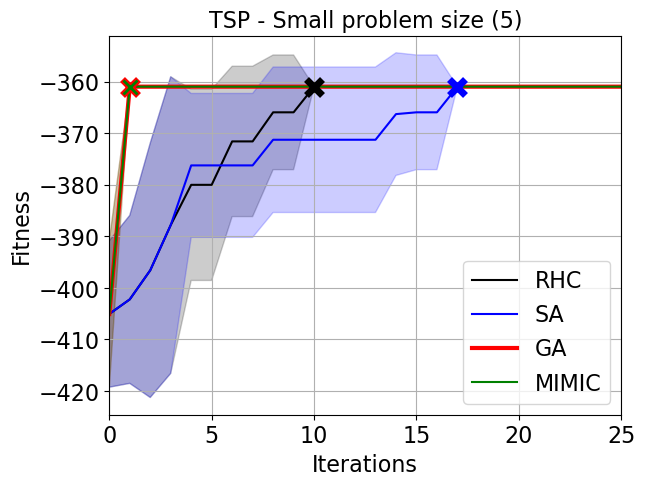

In [60]:
# Small problem size - Fitness
fontsize = 16
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])

ax.plot(df_fitness_small['Iteration'].values, -df_fitness_small['mean'].values, label='RHC',color='k')
ax.fill_between(df_fitness_small['Iteration'].values, -df_fitness_small['mean'].values + df_fitness_small['std'].values,
                        -df_fitness_small['mean'].values - df_fitness_small['std'].values, alpha=0.2, color="k")

ax.plot(df_sa_small[df_sa_small['Temperature']==0.001]['Iteration'].values, -df_sa_small[df_sa_small['Temperature']==0.001]['Fitness_mean'].values, label='SA',color='b')
ax.fill_between(df_sa_small[df_sa_small['Temperature']==0.001]['Iteration'].values, 
        -df_sa_small[df_sa_small['Temperature']==0.001]['Fitness_mean'].values + 
        df_sa_small[df_sa_small['Temperature']==0.001]['Fitness_std'].values, 
        -df_sa_small[df_sa_small['Temperature']==0.001]['Fitness_mean'].values - 
        df_sa_small[df_sa_small['Temperature']==0.001]['Fitness_std'].values, alpha=0.2, color="b")

ax.plot(df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['Iteration'].values, 
        -df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['Fitness_mean'].values, label='GA', color='r', linewidth=3)
ax.fill_between(df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['Iteration'].values, 
        -df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['Fitness_mean'].values +
        df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['Fitness_std'].values, 
        -df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['Fitness_mean'].values -
        df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['Fitness_std'].values, alpha=0.2, color="r")

ax.plot(df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['Iteration'].values, 
        -df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['Fitness_mean'].values, label='MIMIC', color='g')
ax.fill_between(df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['Iteration'].values, 
        -df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['Fitness_mean'].values +
        df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['Fitness_std'].values, 
        -df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['Fitness_mean'].values -
        df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['Fitness_std'].values, alpha=0.2, color="g")

ax.plot(10, -361, 'x', color='k', markersize=12, markeredgewidth=5)
ax.plot(17, -361, 'x', color='b', markersize=12, markeredgewidth=5)
ax.plot( 1, -361, 'x', color='r', markersize=12, markeredgewidth=5)
ax.plot( 1, -361, 'x', color='g', markersize=10, markeredgewidth=2)

ax.legend(fontsize=fontsize)
ax.set_title('TSP - Small problem size (5)', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Fitness', fontsize=fontsize)
#ax.set_ylim(0.6, 1.02)
ax.set_xlim(0, 25)
#fig.savefig('DT-learning_curves-roc_auc.png')
plt.grid(True)
plt.show()
plt.close(fig)


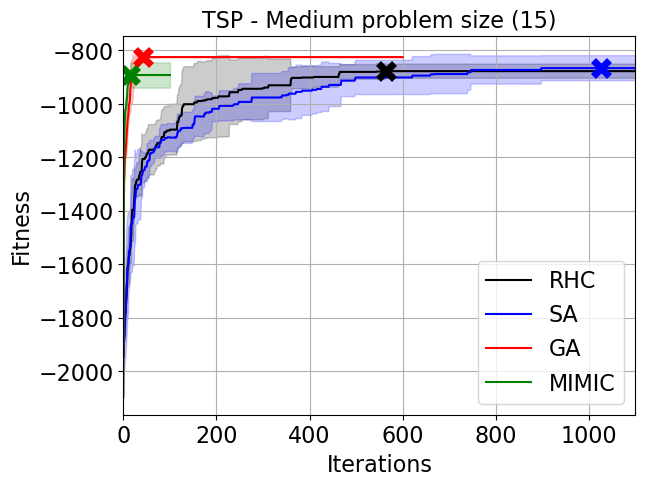

In [102]:
# Medium problem size - Fitness

fontsize = 16
fig = plt.figure()
ax = fig.add_axes([0.17, 0.14, 0.80, 0.79])

ax.plot(df_fitness_medium['Iteration'].values, -df_fitness_medium['mean'].values, label='RHC',color='k')
ax.fill_between(df_fitness_medium['Iteration'].values, -df_fitness_medium['mean'].values + df_fitness_medium['std'].values, 
                -df_fitness_medium['mean'].values - df_fitness_medium['std'].values, alpha=0.2, color="k")

ax.plot(df_sa_medium[df_sa_medium['Temperature']==5.0]['Iteration'].values, -df_sa_medium[df_sa_medium['Temperature']==5.0]['Fitness_mean'].values, label='SA', color='b')
ax.fill_between(df_sa_medium[df_sa_medium['Temperature']==5.0]['Iteration'].values, 
        -df_sa_medium[df_sa_medium['Temperature']==5.0]['Fitness_mean'].values +
        df_sa_medium[df_sa_medium['Temperature']==5.0]['Fitness_std'].values, 
        -df_sa_medium[df_sa_medium['Temperature']==5.0]['Fitness_mean'].values -
        df_sa_medium[df_sa_medium['Temperature']==5.0]['Fitness_std'].values, alpha=0.2, color="b")

ax.plot(df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['Iteration'].values, 
        -df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['Fitness_mean'].values, label='GA', color='r')
ax.fill_between(df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['Iteration'].values, 
        -df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['Fitness_mean'].values +
        df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['Fitness_std'].values, 
        -df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['Fitness_mean'].values -
        df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['Fitness_std'].values, alpha=0.2, color="r")

ax.plot(df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['Iteration'].values, 
        -df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['Fitness_mean'].values, label='MIMIC', color='g')
ax.fill_between(df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['Iteration'].values, 
        -df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['Fitness_mean'].values +
        df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['Fitness_std'].values, 
        -df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['Fitness_mean'].values -
        df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['Fitness_std'].values, alpha=0.2, color="g")

ax.plot( 564, -878.1, 'x', color='k', markersize=12, markeredgewidth=5)
ax.plot(1026, -866.8, 'x', color='b', markersize=12, markeredgewidth=5)
ax.plot(  43, -825.4, 'x', color='r', markersize=12, markeredgewidth=5)
ax.plot(  15, -892.6, 'x', color='g', markersize=12, markeredgewidth=5)

ax.legend(fontsize=fontsize, loc='lower right')
ax.set_title('TSP - Medium problem size (15)', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Fitness', fontsize=fontsize)
#ax.set_ylim(0.6, 1.02)
ax.set_xlim(0, 1100)
plt.grid(True)
plt.show()
plt.close(fig)

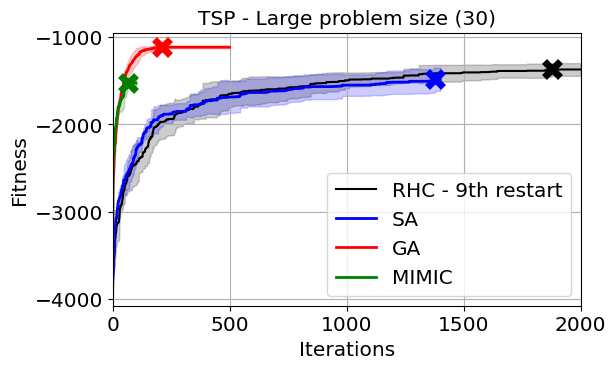

In [114]:
# Large problem size - Fitness

fontsize = 14.5
#fig = plt.figure()
#ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
fig = plt.figure(figsize=(6,3.5))
ax = fig.add_axes([0.17, 0.15, 0.78, 0.78])

#ax.plot(df_fitness_large['Iteration'].values, -df_fitness_large['mean'].values, label='RHC',color='k')
#ax.fill_between(df_fitness_large['Iteration'].values, -df_fitness_large['mean'].values + df_fitness_large['std'].values, 
#                 -df_fitness_large['mean'].values - df_fitness_large['std'].values, alpha=0.2, color="k")

ax.plot(df_rhc_large[df_rhc_large['current_restart']==9]['Iteration'].values, -df_rhc_large[df_rhc_large['current_restart']==9]['fitness_mean'].values, 
        label='RHC - 9th restart', color='k')
ax.fill_between(df_rhc_large[df_rhc_large['current_restart']==9]['Iteration'].values, 
        -df_rhc_large[df_rhc_large['current_restart']==9]['fitness_mean'].values + 
         df_rhc_large[df_rhc_large['current_restart']==9]['fitness_std'].values,
        -df_rhc_large[df_rhc_large['current_restart']==9]['fitness_mean'].values - 
         df_rhc_large[df_rhc_large['current_restart']==9]['fitness_std'].values, alpha=0.2, color="k")

ax.plot(df_sa_large[df_sa_large['Temperature']==5.0]['Iteration'].values, -df_sa_large[df_sa_large['Temperature']==5.0]['Fitness_mean'].values, 
        label='SA', color='b', linewidth=2)
ax.fill_between(df_sa_large[df_sa_large['Temperature']==5.0]['Iteration'].values, 
        -df_sa_large[df_sa_large['Temperature']==5.0]['Fitness_mean'].values + 
        df_sa_large[df_sa_large['Temperature']==5.0]['Fitness_std'].values,
        -df_sa_large[df_sa_large['Temperature']==5.0]['Fitness_mean'].values - 
        df_sa_large[df_sa_large['Temperature']==5.0]['Fitness_std'].values, alpha=0.2, color="b")

ax.plot(df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['Iteration'].values, 
        -df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['Fitness_mean'].values, 
        label='GA', color='r', linewidth=2)
ax.fill_between(df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['Iteration'].values, 
        -df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['Fitness_mean'].values +
        df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['Fitness_std'].values,  
        -df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['Fitness_mean'].values -
        df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['Fitness_std'].values, alpha=0.2, color="r")

ax.plot(df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['Iteration'].values, 
        -df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['Fitness_mean'].values, 
        label='MIMIC', color='g', linewidth=2)
ax.fill_between(df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['Iteration'].values, 
        -df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['Fitness_mean'].values +
        df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['Fitness_std'].values,
        -df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['Fitness_mean'].values -
        df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['Fitness_std'].values, alpha=0.2, color="g")

ax.plot(1876, -1369.2, 'x', color='k', markersize=12, markeredgewidth=5)
ax.plot(1378, -1480.0, 'x', color='b', markersize=12, markeredgewidth=5)
ax.plot( 213, -1113.2, 'x', color='r', markersize=12, markeredgewidth=5)
ax.plot(  64, -1525.3, 'x', color='g', markersize=12, markeredgewidth=5)

ax.legend(fontsize=fontsize)
ax.set_title('TSP - Large problem size (30)', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Fitness', fontsize=fontsize)
#ax.set_ylim(0.6, 1.02)
ax.set_xlim(0, 2000)
plt.grid(True)
plt.show()
fig.savefig('tsp_large_fitness.png')
plt.close(fig)

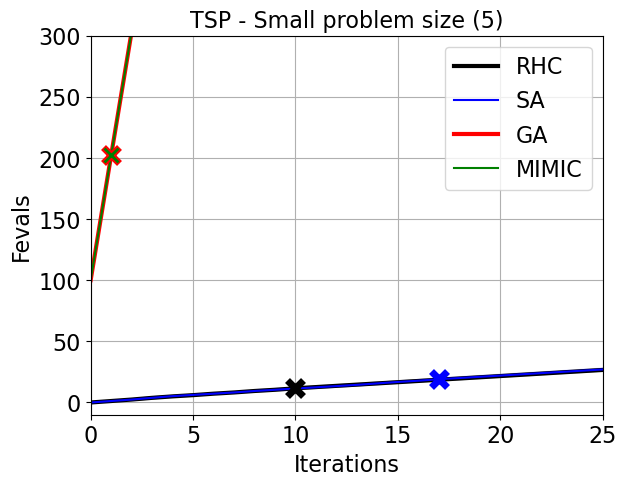

In [86]:
# Small problem size - Fevals
fontsize = 16
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])

ax.plot(df_fevals_small['Iteration'].values, df_fevals_small['mean'].values, label='RHC', color='k', linewidth=3)
ax.fill_between(df_fevals_small['Iteration'].values, df_fevals_small['mean'].values + df_fevals_small['std'].values, 
                df_fevals_small['mean'].values - df_fevals_small['std'].values, alpha=0.2, color="k")

ax.plot(df_sa_small[df_sa_small['Temperature']==0.001]['Iteration'].values, df_sa_small[df_sa_small['Temperature']==0.001]['FEvals_mean'].values, label='SA',color='b')
ax.fill_between(df_sa_small[df_sa_small['Temperature']==0.001]['Iteration'].values, 
        df_sa_small[df_sa_small['Temperature']==0.001]['FEvals_mean'].values + 
        df_sa_small[df_sa_small['Temperature']==0.001]['FEvals_std'].values, 
        df_sa_small[df_sa_small['Temperature']==0.001]['FEvals_mean'].values - 
        df_sa_small[df_sa_small['Temperature']==0.001]['FEvals_std'].values, alpha=0.2, color="b")

ax.plot(df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['Iteration'].values, 
        df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['FEvals_mean'].values, 
        label='GA', color='r', linewidth=3)
ax.fill_between(df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['Iteration'].values, 
        df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['FEvals_mean'].values +
        df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['FEvals_std'].values,
        df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['FEvals_mean'].values -
        df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['FEvals_std'].values, alpha=0.2, color="r")

ax.plot(df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['Iteration'].values, 
        df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['FEvals_mean'].values, label='MIMIC', color='g')
ax.fill_between(df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['Iteration'].values, 
        df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['FEvals_mean'].values +
        df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['FEvals_std'].values,
        df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['FEvals_mean'].values -
        df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['FEvals_std'].values, alpha=0.2, color="g")

ax.plot(10, 11.6, 'x', color='k', markersize=12, markeredgewidth=5)
ax.plot(17,  19, 'x', color='b', markersize=12, markeredgewidth=5)
ax.plot( 1, 202, 'x', color='r', markersize=12, markeredgewidth=5)
ax.plot( 1, 202, 'x', color='g', markersize=10, markeredgewidth=2)

ax.legend(fontsize=fontsize)
ax.set_title('TSP - Small problem size (5)', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Fevals', fontsize=fontsize)
ax.set_ylim(-10, 300)
ax.set_xlim(0, 25)
#fig.savefig('DT-learning_curves-roc_auc.png')
plt.grid(True)
plt.show()
plt.close(fig)

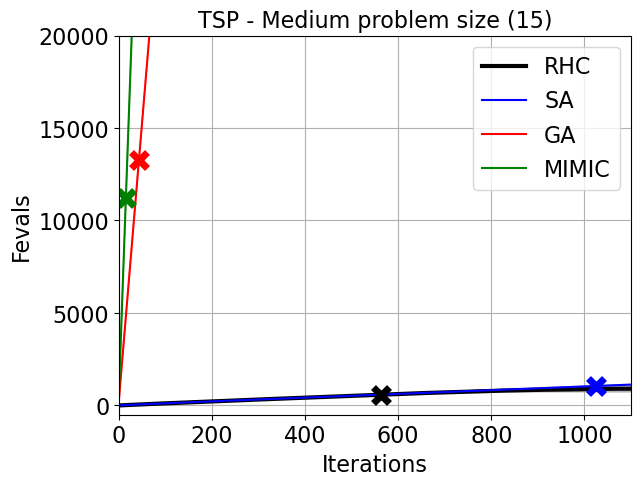

In [85]:
# Medium problem size - Fevals

fontsize = 16
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])

ax.plot(df_fevals_medium['Iteration'].values, df_fevals_medium['mean'].values, label='RHC', color='k', linewidth=3)
ax.fill_between(df_fevals_medium['Iteration'].values, df_fevals_medium['mean'].values + df_fevals_medium['std'].values, 
                df_fevals_medium['mean'].values - df_fevals_medium['std'].values, alpha=0.2, color="k")

ax.plot(df_sa_medium[df_sa_medium['Temperature']==5.0]['Iteration'].values, df_sa_medium[df_sa_medium['Temperature']==5.0]['FEvals_mean'].values, label='SA', color='b')
ax.fill_between(df_sa_medium[df_sa_medium['Temperature']==5.0]['Iteration'].values, 
        df_sa_medium[df_sa_medium['Temperature']==5.0]['FEvals_mean'].values +
        df_sa_medium[df_sa_medium['Temperature']==5.0]['FEvals_std'].values,  
        df_sa_medium[df_sa_medium['Temperature']==5.0]['FEvals_mean'].values -
        df_sa_medium[df_sa_medium['Temperature']==5.0]['FEvals_std'].values, alpha=0.2, color="b")

ax.plot(df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['Iteration'].values, 
        df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['FEvals_mean'].values, label='GA', color='r')
ax.fill_between(df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['Iteration'].values, 
        df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['FEvals_mean'].values +
        df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['FEvals_std'].values,
        df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['FEvals_mean'].values -
        df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['FEvals_std'].values, alpha=0.2, color="r")

ax.plot(df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['Iteration'].values, 
        df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['FEvals_mean'].values, label='MIMIC', color='g')
ax.fill_between(df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['Iteration'].values, 
        df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['FEvals_mean'].values +
        df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['FEvals_std'].values,
        df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['FEvals_mean'].values -
        df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['FEvals_std'].values, alpha=0.2, color="g")

ax.plot( 564, 587.6, 'x', color='k', markersize=12, markeredgewidth=5)
ax.plot(1026, 1055.2, 'x', color='b', markersize=12, markeredgewidth=5)
ax.plot(  43, 13257.6, 'x', color='r', markersize=12, markeredgewidth=5)
ax.plot(  15, 11222.8, 'x', color='g', markersize=12, markeredgewidth=5)

ax.legend(fontsize=fontsize)
ax.set_title('TSP - Medium problem size (15)', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Fevals', fontsize=fontsize)
ax.set_ylim(-500, 20000)
ax.set_xlim(0, 1100)
plt.grid(True)
plt.show()
plt.close(fig)

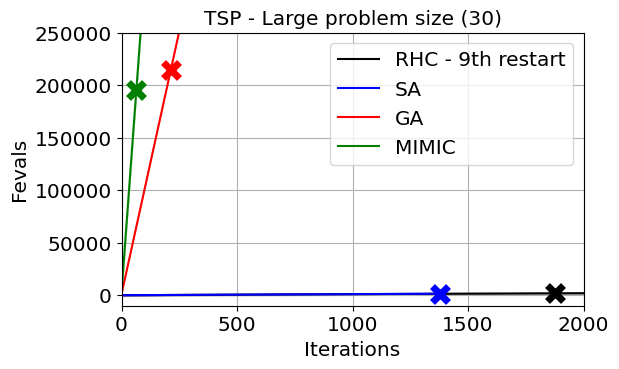

In [115]:
# Large problem size - Fevals

fontsize = 14.5
#fig = plt.figure()
#ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
fig = plt.figure(figsize=(6,3.5))
ax = fig.add_axes([0.19, 0.15, 0.77, 0.78])

k = df_rhc_large[df_rhc_large['current_restart']==9]['fevals_mean'].values[0]

ax.plot(df_rhc_large[df_rhc_large['current_restart']==9]['Iteration'].values, df_rhc_large[df_rhc_large['current_restart']==9]['fevals_mean'].values - k, 
        label='RHC - 9th restart', color='k')
ax.fill_between(df_rhc_large[df_rhc_large['current_restart']==9]['Iteration'].values, 
         df_rhc_large[df_rhc_large['current_restart']==9]['fevals_mean'].values - k + 
         df_rhc_large[df_rhc_large['current_restart']==9]['fevals_std'].values,
         df_rhc_large[df_rhc_large['current_restart']==9]['fevals_mean'].values - k - 
         df_rhc_large[df_rhc_large['current_restart']==9]['fevals_std'].values, alpha=0.2, color="k")

ax.plot(df_sa_large[df_sa_large['Temperature']==5.0]['Iteration'].values, df_sa_large[df_sa_large['Temperature']==5.0]['FEvals_mean'].values, label='SA', color='b')
ax.fill_between(df_sa_large[df_sa_large['Temperature']==5.0]['Iteration'].values, 
        df_sa_large[df_sa_large['Temperature']==5.0]['FEvals_mean'].values + 
        df_sa_large[df_sa_large['Temperature']==5.0]['FEvals_std'].values, 
        df_sa_large[df_sa_large['Temperature']==5.0]['FEvals_mean'].values - 
        df_sa_large[df_sa_large['Temperature']==5.0]['FEvals_std'].values, alpha=0.2, color="b")

ax.plot(df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['Iteration'].values, 
        df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['FEvals_mean'].values, 
        label='GA', color='r')
ax.fill_between(df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['Iteration'].values, 
        df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['FEvals_mean'].values +
        df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['FEvals_std'].values, 
        df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['FEvals_mean'].values -
        df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['FEvals_std'].values, alpha=0.2, color="r")

ax.plot(df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['Iteration'].values, 
        df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['FEvals_mean'].values, 
        label='MIMIC', color='g')
ax.fill_between(df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['Iteration'].values, 
        df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['FEvals_mean'].values +
        df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['FEvals_std'].values, 
        df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['FEvals_mean'].values -
        df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['FEvals_std'].values, alpha=0.2, color="g")

ax.plot(1876, 1854.8, 'x', color='k', markersize=12, markeredgewidth=5)
ax.plot(1378, 1428.4, 'x', color='b', markersize=12, markeredgewidth=5)
ax.plot( 213, 214266.4, 'x', color='r', markersize=12, markeredgewidth=5)
ax.plot(  64, 195083.8, 'x', color='g', markersize=12, markeredgewidth=5)

ax.legend(fontsize=fontsize)
ax.set_title('TSP - Large problem size (30)', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Fevals', fontsize=fontsize)
ax.set_ylim(-10000, 250000)
ax.set_xlim(0, 2000)
plt.grid(True)
plt.show()
fig.savefig('tsp_large_fevals.png')
plt.close(fig)

In [94]:
df_rhc_large[df_rhc_large['current_restart']==9]['Iteration'].values

array([   0,    1,    2, ..., 1998, 1999, 2000], dtype=int64)

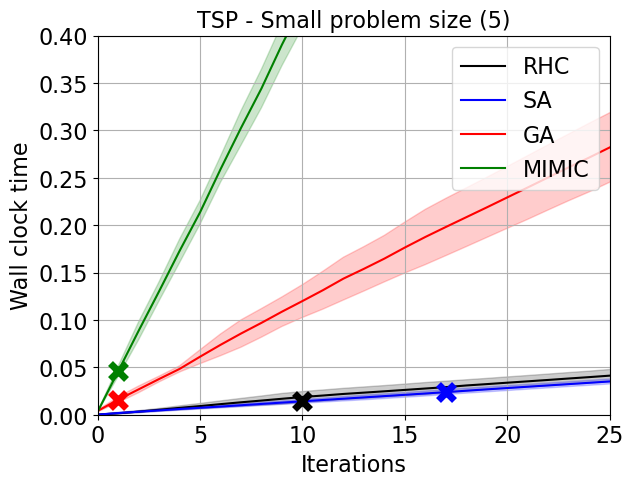

In [65]:
# Small problem size - Wall clock
fontsize = 16
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])

ax.plot(df_time_small['Iteration'].values, df_time_small['mean'].values, label='RHC',color='k')
ax.fill_between(df_time_small['Iteration'].values, df_time_small['mean'].values + df_time_small['std'].values, 
                df_time_small['mean'].values - df_time_small['std'].values, alpha=0.2, color="k")

ax.plot(df_sa_small[df_sa_small['Temperature']==0.001]['Iteration'].values, df_sa_small[df_sa_small['Temperature']==0.001]['Time_mean'].values, label='SA',color='b')
ax.fill_between(df_sa_small[df_sa_small['Temperature']==0.001]['Iteration'].values, 
        df_sa_small[df_sa_small['Temperature']==0.001]['Time_mean'].values + 
        df_sa_small[df_sa_small['Temperature']==0.001]['Time_std'].values,  
        df_sa_small[df_sa_small['Temperature']==0.001]['Time_mean'].values - 
        df_sa_small[df_sa_small['Temperature']==0.001]['Time_std'].values, alpha=0.2, color="b")

ax.plot(df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['Iteration'].values, 
        df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['Time_mean'].values, label='GA', color='r')
ax.fill_between(df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['Iteration'].values, 
        df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['Time_mean'].values +
        df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['Time_std'].values, 
        df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['Time_mean'].values -
        df_ga_small[df_ga_small['Population Size']==100][df_ga_small['Mutation Rate']==0.2]['Time_std'].values, alpha=0.2, color="r")

ax.plot(df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['Iteration'].values, 
        df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['Time_mean'].values, label='MIMIC', color='g')
ax.fill_between(df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['Iteration'].values, 
        df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['Time_mean'].values +
        df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['Time_std'].values, 
        df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['Time_mean'].values -
        df_mmc_small[df_mmc_small['Population Size']==100][df_mmc_small['Keep Percent']==0.5]['Time_std'].values, alpha=0.2, color="g")

ax.plot(10, 0.0148, 'x', color='k', markersize=12, markeredgewidth=5)
ax.plot(17,  0.0239, 'x', color='b', markersize=12, markeredgewidth=5)
ax.plot( 1, 0.0158, 'x', color='r', markersize=12, markeredgewidth=5)
ax.plot( 1, 0.0457, 'x', color='g', markersize=12, markeredgewidth=5)

ax.legend(fontsize=fontsize, loc='upper right')
ax.set_title('TSP - Small problem size (5)', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Wall clock time', fontsize=fontsize)
ax.set_ylim(0., 0.4)
ax.set_xlim(0, 25)
plt.grid(True)
#fig.savefig('DT-learning_curves-roc_auc.png')
plt.show()
plt.close(fig)

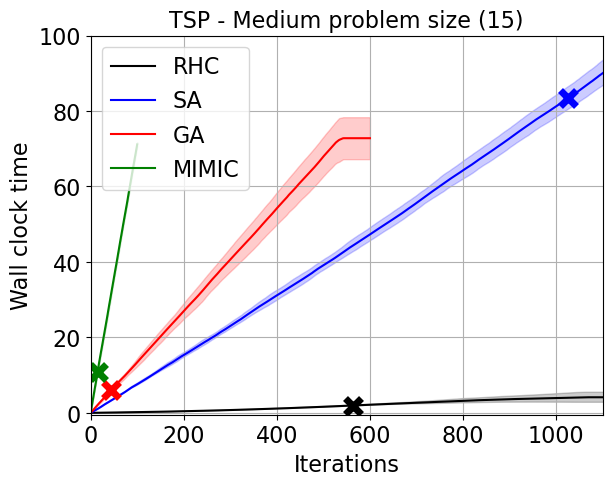

In [77]:
# Medium problem size - Time

fontsize = 16
fig = plt.figure()
ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])

ax.plot(df_time_medium['Iteration'].values, df_time_medium['mean'].values, label='RHC',color='k')
ax.fill_between(df_time_medium['Iteration'].values, df_time_medium['mean'].values + df_time_medium['std'].values, 
                df_time_medium['mean'].values - df_time_medium['std'].values, alpha=0.2, color="k")

ax.plot(df_sa_medium[df_sa_medium['Temperature']==5.0]['Iteration'].values, df_sa_medium[df_sa_medium['Temperature']==5.0]['Time_mean'].values, label='SA', color='b')
ax.fill_between(df_sa_medium[df_sa_medium['Temperature']==5.0]['Iteration'].values, 
        df_sa_medium[df_sa_medium['Temperature']==5.0]['Time_mean'].values +
        df_sa_medium[df_sa_medium['Temperature']==5.0]['Time_std'].values, 
        df_sa_medium[df_sa_medium['Temperature']==5.0]['Time_mean'].values -
        df_sa_medium[df_sa_medium['Temperature']==5.0]['Time_std'].values, alpha=0.2, color="b")

ax.plot(df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['Iteration'].values, 
        df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['Time_mean'].values, label='GA', color='r')
ax.fill_between(df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['Iteration'].values, 
        df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['Time_mean'].values +
        df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['Time_std'].values,
        df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['Time_mean'].values -
        df_ga_medium[df_ga_medium['Population Size']==300][df_ga_medium['Mutation Rate']==0.4]['Time_std'].values, alpha=0.2, color="r")

ax.plot(df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['Iteration'].values, 
        df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['Time_mean'].values, label='MIMIC', color='g')
ax.fill_between(df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['Iteration'].values, 
        df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['Time_mean'].values +
        df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['Time_std'].values,
        df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['Time_mean'].values -
        df_mmc_medium[df_mmc_medium['Population Size']==700][df_mmc_medium['Keep Percent']==0.3]['Time_std'].values, alpha=0.2, color="g")

ax.plot( 564, 1.9165, 'x', color='k', markersize=12, markeredgewidth=5)
ax.plot(1026, 83.42, 'x', color='b', markersize=12, markeredgewidth=5)
ax.plot(  43, 5.933, 'x', color='r', markersize=12, markeredgewidth=5)
ax.plot(  15, 10.93, 'x', color='g', markersize=12, markeredgewidth=5)

ax.legend(fontsize=fontsize)
ax.set_title('TSP - Medium problem size (15)', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Wall clock time', fontsize=fontsize)
ax.set_ylim(-0.5, 100)
plt.grid(True)
ax.set_xlim(0, 1100)
plt.show()
plt.close(fig)

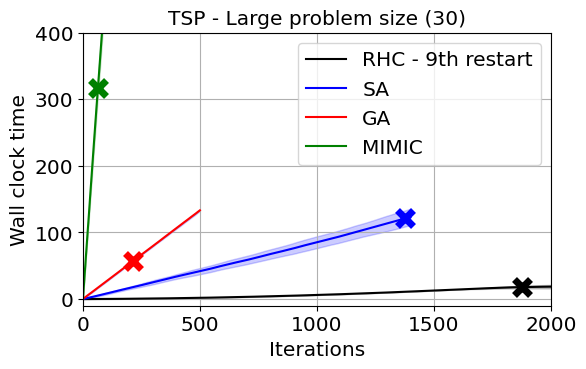

In [113]:
# Large problem size - Time

fontsize = 14.5
#fig = plt.figure()
#ax = fig.add_axes([0.15, 0.14, 0.80, 0.79])
fig = plt.figure(figsize=(6,3.5))
ax = fig.add_axes([0.17, 0.15, 0.78, 0.78])

k = df_rhc_large[df_rhc_large['current_restart']==0]['time_mean'].values[0]

ax.plot(df_rhc_large[df_rhc_large['current_restart']==0]['Iteration'].values, df_rhc_large[df_rhc_large['current_restart']==0]['time_mean'].values - k, 
        label='RHC - 9th restart', color='k')
ax.fill_between(df_rhc_large[df_rhc_large['current_restart']==0]['Iteration'].values, 
         df_rhc_large[df_rhc_large['current_restart']==0]['time_mean'].values - k + 
         df_rhc_large[df_rhc_large['current_restart']==0]['time_std'].values,
         df_rhc_large[df_rhc_large['current_restart']==0]['time_mean'].values - k - 
         df_rhc_large[df_rhc_large['current_restart']==0]['time_std'].values, alpha=0.2, color="k")

ax.plot(df_sa_large[df_sa_large['Temperature']==5.0]['Iteration'].values, df_sa_large[df_sa_large['Temperature']==5.0]['Time_mean'].values, label='SA', color='b')
ax.fill_between(df_sa_large[df_sa_large['Temperature']==5.0]['Iteration'].values, 
        df_sa_large[df_sa_large['Temperature']==5.0]['Time_mean'].values + 
        df_sa_large[df_sa_large['Temperature']==5.0]['Time_std'].values, 
        df_sa_large[df_sa_large['Temperature']==5.0]['Time_mean'].values - 
        df_sa_large[df_sa_large['Temperature']==5.0]['Time_std'].values, alpha=0.2, color="b")

ax.plot(df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['Iteration'].values, 
        df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['Time_mean'].values, label='GA', color='r')
ax.fill_between(df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['Iteration'].values, 
        df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['Time_mean'].values +
        df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['Time_std'].values, 
        df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['Time_mean'].values -
        df_ga_large[df_ga_large['Population Size']==1000][df_ga_large['Mutation Rate']==0.2]['Time_std'].values, alpha=0.2, color="b")

ax.plot(df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['Iteration'].values, 
        df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['Time_mean'].values, label='MIMIC', color='g')
ax.fill_between(df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['Iteration'].values, 
        df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['Time_mean'].values +
        df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['Time_std'].values,  
        df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['Time_mean'].values -
        df_mmc_large[df_mmc_large['Population Size']==3000][df_mmc_large['Keep Percent']==0.4]['Time_std'].values, alpha=0.2, color="g")

ax.plot(1876, 17.98, 'x', color='k', markersize=12, markeredgewidth=5)
ax.plot(1378, 121.1, 'x', color='b', markersize=12, markeredgewidth=5)
ax.plot( 213, 56.82, 'x', color='r', markersize=12, markeredgewidth=5)
ax.plot(  64, 316.3, 'x', color='g', markersize=12, markeredgewidth=5)

ax.legend(fontsize=fontsize)
ax.set_title('TSP - Large problem size (30)', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Iterations', fontsize=fontsize) 
ax.set_ylabel('Wall clock time', fontsize=fontsize)
ax.set_ylim(-10, 400)
ax.set_xlim(0, 2000)
plt.grid(True)
plt.show()
fig.savefig('tsp_large_time.png')
plt.close(fig)